## Setup

In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import sys, os

ROOT_PATH = os.path.abspath(os.path.join("..", ".."))
SRC_PATH = os.path.join(ROOT_PATH, "flaresight")
sys.path.insert(0, SRC_PATH)
print(sys.path)

['c:\\Users\\benja\\Documents\\miru\\flaresight\\flaresight', 'c:\\Users\\benja\\Documents\\miru\\flaresight\\flaresight', 'c:\\Users\\benja\\Documents\\miru\\flaresight\\sample_usage\\data', 'C:\\Users\\benja\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'C:\\Users\\benja\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', 'C:\\Users\\benja\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'C:\\Users\\benja\\AppData\\Local\\Programs\\Python\\Python311', 'c:\\Users\\benja\\Documents\\miru\\flaresight\\env', '', 'c:\\Users\\benja\\Documents\\miru\\flaresight\\env\\Lib\\site-packages', 'c:\\Users\\benja\\Documents\\miru\\flaresight\\env\\Lib\\site-packages\\win32', 'c:\\Users\\benja\\Documents\\miru\\flaresight\\env\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\benja\\Documents\\miru\\flaresight\\env\\Lib\\site-packages\\Pythonwin']


In [33]:
DOWNLOADS_PATH = os.path.join(os.path.expanduser("~"), "downloads")

In [34]:
import random

# local imports
from data.img import Rect, ROI
from filesys.dir import Dir
from filesys.file import File
from media.image_file import ImageFile

# 3rd party imports
import cv2
import matplotlib.pyplot as plt

## Images with Bounding Boxes

In [35]:
dataset_type = "train"  # "train" or "test"
sample = True  # whether to sample images from the dataset or select manually

# specify different datasets (you need to download these to your local computer)
dfire_dir_path = os.path.join(DOWNLOADS_PATH, "dfire", dataset_type)
yolov5_fire_detection_dir_path = os.path.join(DOWNLOADS_PATH, "yolov5_fire_detection", dataset_type)

# select a dataset
dataset_dir_path = dfire_dir_path

# set the dataset directory
image_dir = Dir(os.path.join(dataset_dir_path, "images"))
img_files = image_dir.get_files()

### Load Image and Label

In [36]:
# sample an image
if sample:
    image_file = ImageFile(random.choice(img_files).get_path())
    label_file = File(os.path.join(dfire_dir_path, "labels", "{}.txt".format(
        image_file.get_filename_no_ext()
    )))
# select an image manually
else:
    image_file = ImageFile(os.path.join(DOWNLOADS_PATH, "img.jpg"))
    label_file = File(os.path.join(DOWNLOADS_PATH, "label.txt"))

print("Image File Path: ", image_file.get_path())
image_file.assert_exists()
print("Label File Path: ", label_file.get_path())
label_file.assert_exists()

Image File Path:  C:\Users\benja\downloads\dfire\train\images\WEB01360.jpg
Label File Path:  C:\Users\benja\downloads\dfire\train\labels\WEB01360.txt


### Display an Image

In [39]:
img = image_file.load_img()
data = label_file.read()

# load regions of interest (ROIs) from the label file into the image
objects = []
for line in data.split("\n"):
    if line:
        labels = line.split(" ")
        labels[1] = float(labels[1])  # x
        labels[2] = float(labels[2])  # y
        labels[3] = float(labels[3])  # w
        labels[4] = float(labels[4])  # h
        rect = Rect()
        rect.set_from_yolo(labels[1:], img.width, img.height)
        roi = ROI(rect, labels[0])
        img.add_roi(roi)

if (img.rois != []):
    caption = "Fire or smoke was detected"
else:
    caption = "Fire or smoke was NOT detected"

# add bounding boxes to the image
SMOKE = 0; FIRE = 1
RED = (255, 0, 0); GREEN = (0, 255, 0); BLUE = (0, 0, 255)
boxed = img.ndarray.copy()
for roi in img.rois:
    color = RED if int(roi.label) == FIRE else BLUE
    boxed = cv2.rectangle(
        boxed,
        (roi.box.x, roi.box.y),
        (roi.box.x + roi.box.width, roi.box.y + roi.box.height),
        color,
        1
    )
    print(roi)

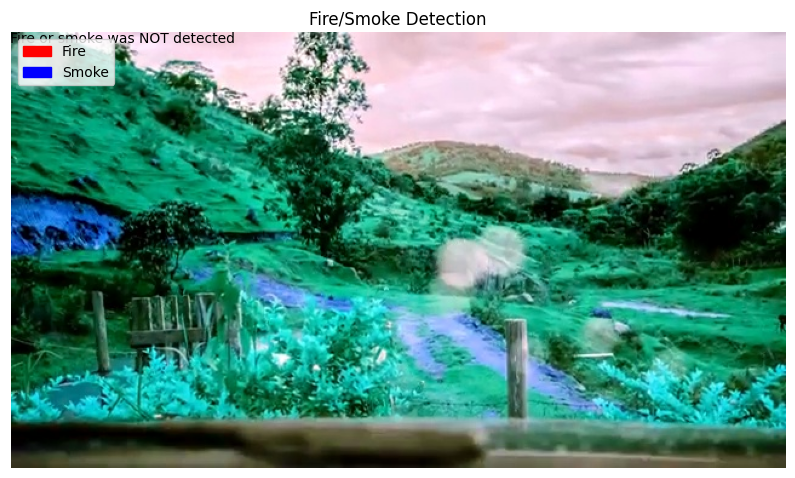

In [48]:
plt.figure(figsize=(10, 10))
plt.title(caption)
plt.imshow(boxed)
plt.axis("off")

# legend
red_patch = plt.Rectangle((0, 0), 1, 1, color='red')
blue_patch = plt.Rectangle((0, 0), 1, 1, color='blue')
labels = ['Fire', 'Smoke']
plt.legend([red_patch, blue_patch], labels, loc='upper left')

plt.show()

## 